In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
positive_subject_dir = './healthy_20240612'
df= pd.read_csv('./healthy_20240612/label_poms.csv')

In [3]:
# Extracting specific emotion-related columns
emotions_data = df[['1. Tense', '2. Anger', '3. Weary', '4. Unhappy', '5. Cheerful',
                      '6. Confused', '7. Embarrassed', '8. Uneasy', '9. Grouchy',
                      '10. Fatigued', '11. Sad', '12. Vigorous', '13. Can\'t concentrate',
                      '14. Confident', '15. Restless', '16. Peeved', '17. Worn out',
                      '18. Discouraged', '19. Active', '20. Bewildered', '21. On-edge',
                      '22. Annoyed', '23. Bushed', '24. Miserable', '25. Energetic',
                      '26. Forgetful', '27. Competent', '28. Nervous', '29. Resentful',
                      '30. Exhausted', '31. Worthless', '32. Lively', '33. Uncertain',
                      '34. Satisfied', '35. Anxious', '36. Furious', '37. Bitter',
                      '38. Helpless', '39. Full of pep', '40. Proud']]

# Generate descriptive statistics for each column to understand the range and distribution of responses
descriptive_stats = emotions_data.describe()

# Analyzing for any potential inconsistencies or outliers based on statistical summary
outliers = {}
for column in emotions_data.columns:
    q1 = descriptive_stats.at['25%', column]
    q3 = descriptive_stats.at['75%', column]
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Filter the data to find outliers for each emotion
    outliers[column] = emotions_data[(emotions_data[column] < lower_bound) | (emotions_data[column] > upper_bound)]

# Count the number of outliers per emotion to identify where most unusual scores are present
outlier_counts = {emotion: len(df) for emotion, df in outliers.items() if not df.empty}

outlier_counts, descriptive_stats


({'2. Anger': 1,
  '6. Confused': 4,
  '7. Embarrassed': 1,
  '9. Grouchy': 3,
  '10. Fatigued': 2,
  '11. Sad': 2,
  '12. Vigorous': 2,
  '16. Peeved': 1,
  '19. Active': 3,
  '20. Bewildered': 1,
  '21. On-edge': 3,
  '23. Bushed': 2,
  '24. Miserable': 1,
  '26. Forgetful': 2,
  '29. Resentful': 1,
  '31. Worthless': 1,
  '33. Uncertain': 1,
  '34. Satisfied': 1,
  '36. Furious': 6,
  '37. Bitter': 3},
         1. Tense   2. Anger   3. Weary  4. Unhappy  5. Cheerful  6. Confused  \
 count  30.000000  30.000000  30.000000   30.000000    30.000000    30.000000   
 mean    2.200000   1.600000   2.333333    2.000000     3.466667     1.766667   
 std     0.961321   0.855006   1.241060    1.259447     1.195778     1.135124   
 min     1.000000   1.000000   1.000000    1.000000     1.000000     0.000000   
 25%     2.000000   1.000000   1.000000    1.000000     2.250000     1.000000   
 50%     2.000000   1.000000   2.000000    1.000000     4.000000     1.000000   
 75%     3.000000   2.00

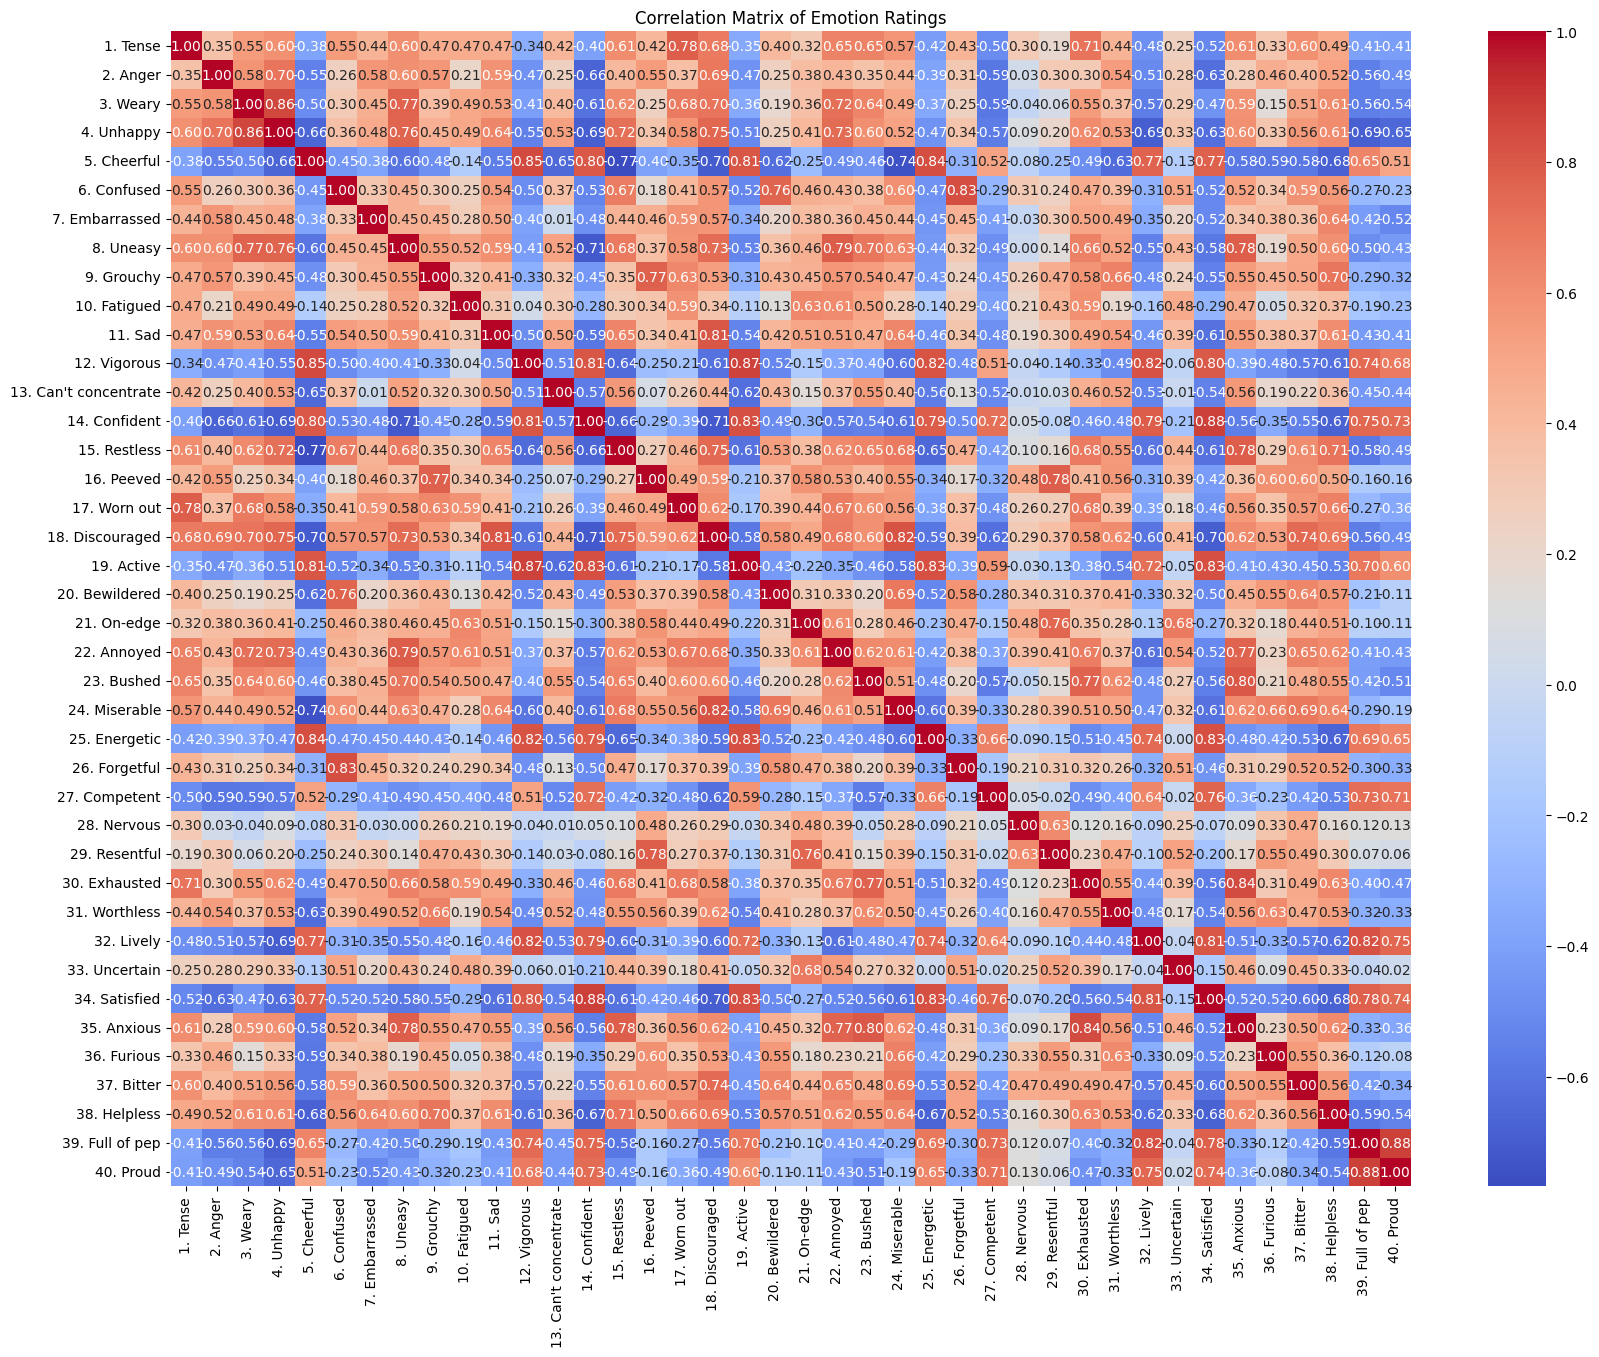

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the visualizations with a larger figure size for clarity
plt.figure(figsize=(20,15))

# Using a heatmap to visualize the correlations among the emotion ratings
correlation_matrix = emotions_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Emotion Ratings')
plt.show()


<Figure size 2000x1000 with 0 Axes>

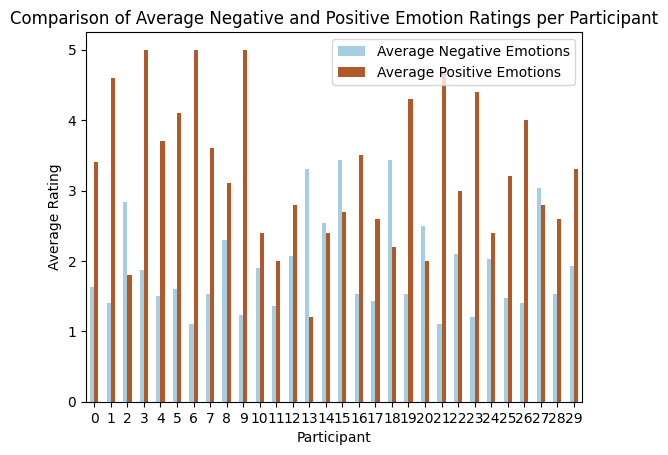

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23120\2333702127.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotions_data.loc[:, 'Average Negative'] = emotions_data[negative_emotions].mean(axis=1)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_23120\2333702127.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotions_data.loc[:, 'Average Positive'] = emotions_data[positive_emotions].mean(axis=1)


<Figure size 2000x1000 with 0 Axes>

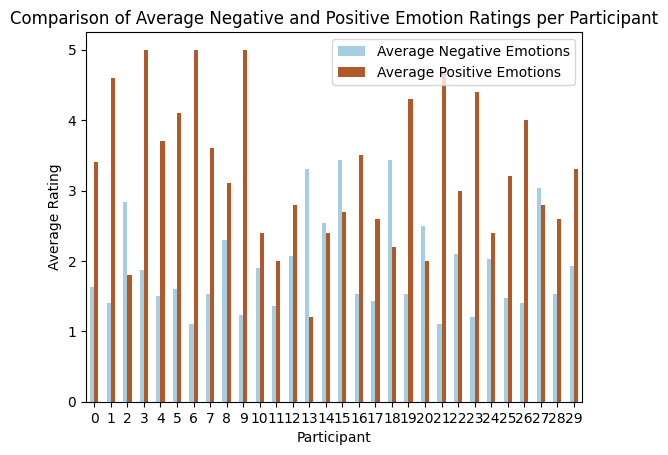

In [5]:
plt.figure(figsize=(20, 10))
# Defining negative and positive emotion categories
negative_emotions = ['1. Tense', '2. Anger', '3. Weary', '4. Unhappy', '6. Confused', 
                     '7. Embarrassed', '8. Uneasy', '9. Grouchy', '10. Fatigued', 
                     '11. Sad', '13. Can\'t concentrate', '15. Restless', '16. Peeved', 
                     '17. Worn out', '18. Discouraged', '20. Bewildered', '21. On-edge', 
                     '22. Annoyed', '23. Bushed', '24. Miserable', '26. Forgetful', 
                     '28. Nervous', '29. Resentful', '30. Exhausted', '31. Worthless', 
                     '33. Uncertain', '35. Anxious', '36. Furious', '37. Bitter', 
                     '38. Helpless']

positive_emotions = ['5. Cheerful', '12. Vigorous', '14. Confident', '19. Active', 
                     '25. Energetic', '27. Competent', '32. Lively', '34. Satisfied', 
                     '39. Full of pep', '40. Proud']

# Calculating average scores for negative and positive emotions for each participant using .loc
emotions_data.loc[:, 'Average Negative'] = emotions_data[negative_emotions].mean(axis=1)
emotions_data.loc[:, 'Average Positive'] = emotions_data[positive_emotions].mean(axis=1)


# Selecting a few participants to visualize
sample_data = emotions_data[['Average Negative', 'Average Positive']]

# Plotting

sample_data.plot(kind='bar', colormap='Paired')
plt.title('Comparison of Average Negative and Positive Emotion Ratings per Participant')
plt.ylabel('Average Rating')
plt.xlabel('Participant')
plt.xticks(ticks=range(30), labels=sample_data.index, rotation=0)
plt.legend(['Average Negative Emotions', 'Average Positive Emotions'])
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_23120\2566839693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotions_data['Difference'] = abs(emotions_data['Average Negative'] - emotions_data['Average Positive'])


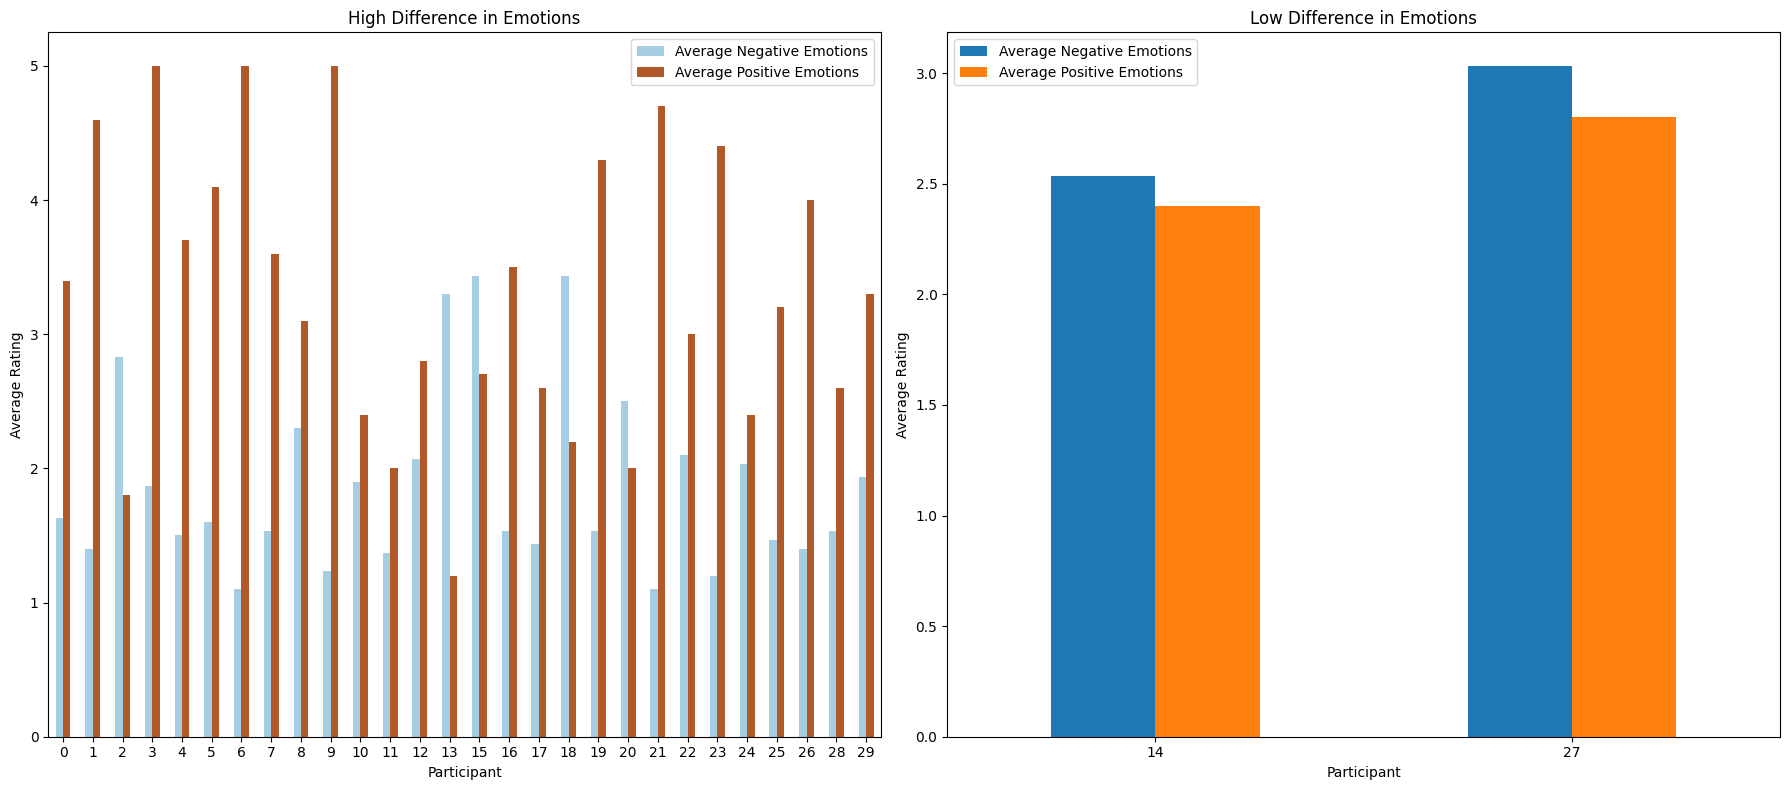

Total subjects with high difference:  28
Total subjects with low difference:  2


In [7]:
# Recalculating the difference and defining dataframes based on the threshold
emotions_data['Difference'] = abs(emotions_data['Average Negative'] - emotions_data['Average Positive'])
high_difference_data = emotions_data[emotions_data['Difference'] >= 0.3]
Low_difference_data = emotions_data[emotions_data['Difference'] < 0.3]

# Setting up the plot area with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot for high difference data
high_difference_data[['Average Negative', 'Average Positive']].plot(kind='bar', ax=axes[0], colormap='Paired')
axes[0].set_title('High Difference in Emotions')
axes[0].set_ylabel('Average Rating')
axes[0].set_xlabel('Participant')
axes[0].set_xticks(range(len(high_difference_data)))
axes[0].set_xticklabels(high_difference_data.index, rotation=0)
axes[0].legend(['Average Negative Emotions', 'Average Positive Emotions'])

# Plot for low difference data
Low_difference_data[['Average Negative', 'Average Positive']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Low Difference in Emotions')
axes[1].set_ylabel('Average Rating')
axes[1].set_xlabel('Participant')
axes[1].set_xticks(range(len(Low_difference_data)))
axes[1].set_xticklabels(Low_difference_data.index, rotation=0)
axes[1].legend(['Average Negative Emotions', 'Average Positive Emotions'])

plt.tight_layout()
plt.show()

# Output the count of subjects in each category
print("Total subjects with high difference: ", len(high_difference_data))
print("Total subjects with low difference: ", len(Low_difference_data))


In [23]:
emotions_data

,1. Tense,2. Anger,3. Weary,4. Unhappy,5. Cheerful,6. Confused,7. Embarrassed,8. Uneasy,9. Grouchy,10. Fatigued,...,34. Satisfied,35. Anxious,36. Furious,37. Bitter,38. Helpless,39. Full of pep,40. Proud,Average Negative,Average Positive,Difference
0,3,1,3,2,4,1,1,2,1,3,...,4,1,1,2,1,3,3,1.633333,3.4,1.766667
1,2,1,2,1,5,1,2,2,1,2,...,5,2,1,1,1,5,4,1.400000,4.6,3.200000
2,4,1,4,4,3,4,1,3,1,4,...,2,4,1,4,2,1,1,2.833333,1.8,1.033333
3,1,1,1,1,5,1,1,1,1,5,...,5,1,1,2,1,5,5,1.866667,5.0,3.133333
4,2,1,1,1,4,2,1,1,1,3,...,4,2,1,1,2,3,4,1.500000,3.7,2.200000
5,2,1,1,1,4,2,1,2,1,3,...,4,3,1,1,1,4,4,1.600000,4.1,2.500000
6,1,1,1,1,5,1,1,1,1,1,...,5,1,1,1,1,5,5,1.100000,5.0,3.900000
7,1,1,1,1,4,2,1,2,1,2,...,3,3,1,2,1,4,3,1.533333,3.6,2.066667
8,3,1,1,1,3,1,2,1,3,2,...,3,4,2,3,2,4,3,2.300000,3.1,0.800000
9,2,1,1,1,5,1,1,1,1,2,...,5,1,1,1,1,5,5,1.233333,5.0,3.766667
